# PIC data

In [1]:
from astropy.constants import m_e, e, k_B
k = k_B.value
me = m_e.value
q = e.value
import numpy as np
import matplotlib.pyplot as plt

import json
%matplotlib notebook

from scipy.interpolate import interp1d
from math import ceil
plt.style.use("presentation")

In [2]:
with open("NewPic1D.dat", "r") as f:
    dataPIC = json.load(f)
# with open("PIC_data.dat", "r") as f:
#     dataPIC = json.load(f)
        
with open("NewPIC_EVDFs.dat", "r") as f:
    data = json.load(f)
# with open("PIC_EVDFs.dat", "r") as f:
#     data = json.load(f)
        
print(data.keys())
print("~~~~~~~~~~~~~~~ \n")
print(data["info"])
print("~~~~~~~~~~~~~~~ \n")
print("Run disponibles")
for k in ["0","1","2"]:
    run = data[k]
    print(k," p = ",run["p"], "mTorr")
    
dx = dataPIC["0"]["dx"]

dict_keys(['info', '0', '1', '2', '3', '4', '5'])
~~~~~~~~~~~~~~~ 

Informations
p: pressur un mTorr
probnames: list of the names of the probes (also keys of the dict)
prob_center: center of the prob
in the prob data:
    position: the coords of the bin :ymin, ymax
    absciss: the velocities of the EVDFs (Vx, Vy, Vz)
    EVDF: the EVDFs (Vx, Vy, Vz)

~~~~~~~~~~~~~~~ 

Run disponibles
0  p =  0.1 mTorr
1  p =  2.0 mTorr
2  p =  10.0 mTorr


In [3]:
k = '0'
probnames = np.array(data[k]["probnames"])
prob_center = np.array(data[k]["prob_center"])
prob_y0 = np.array(data[k]["prob_y0"])
prob_y1 = np.array(data[k]["prob_y1"])

print(probnames)
print(prob_center)
dx = data[k]["dx"]*1000


['001' '002' '003' '004' '005' '006' '007' '008' '009' '010' '011' '012']
[  2.5   7.5  15.   25.   35.   50.   70.   90.  125.  175.  250.  450. ]


In [4]:
def returnxy(pn, k="1"):
    a = np.array(data[k][pn]['absciss'])
    V = np.array(data[k][pn]['EVDF'])
    idenx = 1
    x = a[:,idenx]
    x = x**2*np.sign(x)*me/q/2
    y = V[:,idenx]
    
    index = np.argwhere(pn == probnames)[0][0]
    xcenter = prob_center[index]
    x0 = int(prob_y0[index])
    x1 = int(prob_y1[index])
    
    phi = np.array(dataPIC[k]["phi"])
    pc = interp1d(np.arange(len(phi)),phi)(xcenter)
    p0 = phi[x0]
    p1 = phi[x1]
    
    # p = phi[int(xcenter)]
    return x, y, pc , p0, p1

/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/matplotlib/figure.py:2144: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  warnings.warn("This figure was using constrained_layout==True, "
No handles with labels found to put in legend.


Text(0.5, 0, '$\\phi$ [V]')

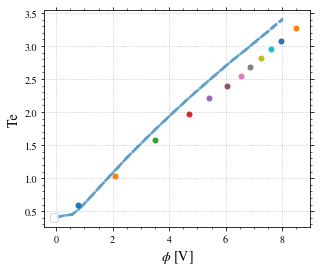

In [9]:
# plot 
plt.figure(figsize=(4.5,4))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

ft = 14
s = 2.5

for Nprob in range(len(probnames)):
    
    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob])
    # x, y, phic = returnxy(probnames[Nprob])
    y0sum = (y).max()
    T = np.sum(np.abs(x) * y)/y.sum()*2
    plt.scatter(phic, T)
    
phi = np.array(dataPIC[k]["phi"])
Te = np.array(dataPIC[k]["Te2"])
plt.plot(phi, Te,linewidth=s, alpha=0.7,ls="--" )

# plt.legend( fontsize=ft,loc=(1,0.1 ))
plt.legend(loc = 'lower left', fontsize=11)
plt.grid(alpha=0.5)
plt.ylabel("Te", fontsize=ft)
plt.xlabel("$\phi$ [V]", fontsize=ft)



# Heatflux from EVDF

(10, 7516610.724189471)

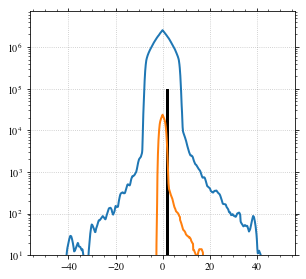

In [10]:
k = "0"
Nprob = -1
x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k=k)
plt.figure(figsize=(4.5,4.5))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

plt.plot(x,y)

Nprob = 1
x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k=k)
plt.plot(x,y)

plt.yscale("log")
plt.vlines([phic,phic*1.3], 0.001,1e5)
plt.ylim(bottom=10)

(10, 292425.90040283627)

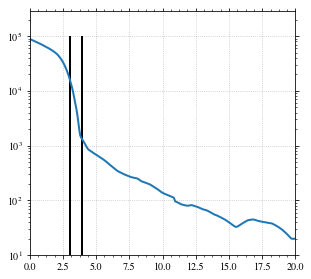

In [11]:
k = "0"
Nprob = 2
x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k=k)
plt.figure(figsize=(4.5,4.5))
plt.subplots_adjust(left=0.17, bottom=0.17, right=0.99, top=0.925, wspace=0.05, hspace=0.25)

plt.plot(x,y)
plt.yscale("log")
plt.vlines([phic,phic*1.3], 0.001,1e5)
plt.xlim(0, 20)
plt.ylim(bottom=10)

In [12]:
from scipy.integrate import simps

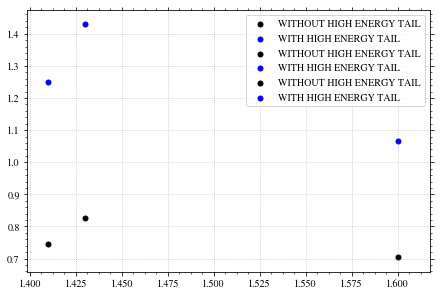

In [43]:
def return_heat_flux(k="0", Nprob=2, cut=True):
    
    x, y, phic, phi0, phi1 = returnxy(probnames[Nprob], k=k)
    y /= y.sum()
    if cut:
        mask = (x>phic) & (x<=1.1*phic)
    else:
        mask = (x>phic) 
            
    
    heatflux = simps(0.5*x[mask]*y[mask], x[mask])
    
    flux = simps(y[mask], x[mask])
    
    x, y, phic, phi0, phi1 = returnxy(probnames[9], k=k)
    mask = (x>0) 
            
    T = np.sum(np.abs(x[mask]) * y[mask])/y[mask].sum()*2 
    
    return heatflux/flux/T

plt.figure()

for gamma, k in zip([1.6, 1.43, 1.41], ["0", "1", "2"]):
    
    plt.scatter(gamma, return_heat_flux(k, Nprob=3), c="k", label="WITHOUT HIGH ENERGY TAIL")
    plt.scatter(gamma, return_heat_flux(k, Nprob=3, cut=False), c="b", label="WITH HIGH ENERGY TAIL")    
    
plt.legend()

# conclusion

When calculating the heat flux from the EVDF, we get that:
$$\frac{Q_e}{\Gamma_e T_e} \simeq 0.315$$

Which is very close from the theoritical value varing from 0.3 to 0.1.